In [15]:
import numpy as np
import pickle


with open("datav30_pickle", 'rb') as output:
    datav30 = pickle.load(output)
    

number_stars_list = datav30.nstar
indices = []
filtered_list = []
for index in range(len(number_stars_list)):
    element = number_stars_list[index]
    if element > 80:
        indices.append(index);
        filtered_list.append(element);

print(number_stars_list) # [12480  1723   145 ...     0     0     0]
print(filtered_list) # [12480, 1723, 145, 153, 161, 97, 96]
print(indices) # [0, 1, 2, 3, 4, 5, 8]



[12480  1723   145 ...     0     0     0]
[12480, 1723, 145, 153, 161, 97, 96]
[0, 1, 2, 3, 4, 5, 8]


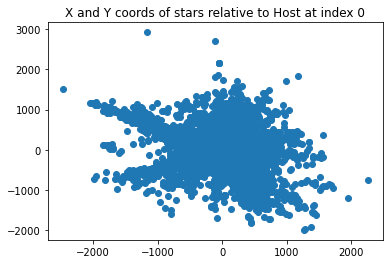

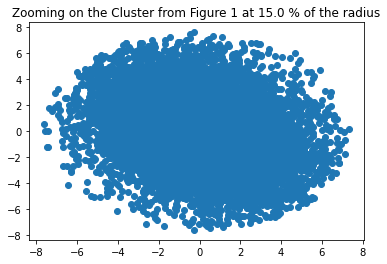

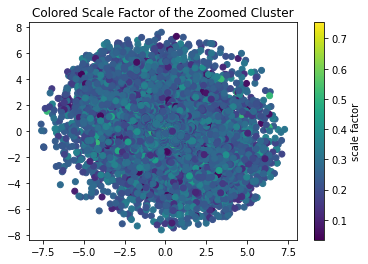

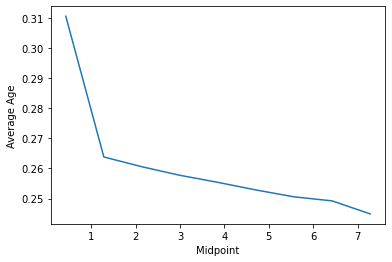

In [2]:
def stellarMass_haloMass(mass1, mass2, constant):    
    plt.scatter(np.log10(mass1/constant),np.log10(mass2/constant))
    plt.xlabel('Halo Mass (Msun)')
    plt.ylabel('Stellar Mass (Msun)')
    plt.show()

def initial(index, r_zoom, partq, dataq, h):
    #adjust x-, y- and z-coordinates so that it is relative to host star
    
    r_vir = dataq[index].rvir/h
    
    #adjusting the radius of the galaxy
    rgal = r_zoom*dataq[index].rvir/h
    
    x1 = partq.x - (dataq[index].xc/h)
    y1 = partq.y - (dataq[index].yc/h)
    z1 = partq.z - (dataq[index].zc/h)
    
    r1 = np.sqrt(x1**2 + y1**2 + z1**2)
    
    x_vir = x1[r1<r_vir]
    y_vir = y1[r1<r_vir]
    z_vir = z1[r1<r_vir]
    
    x = x1 - np.mean(x_vir)
    y = y1 - np.mean(y_vir)
    z = z1 - np.mean(z_vir)
    r = np.sqrt(x**2 + y**2 + z**2)
    
    #creating restrictions on the previous coordinates.
    #zooming in on the cluster by only looking at stars that are 15% of the radius away from the host
    x_g = x[r<rgal]
    y_g = y[r<rgal]
    z_g = z[r<rgal]
    
    #have to look at the mean, if the value is 0 or not
    #code here
    
    a_g = partq.a[r<rgal]
    r_g = r[r<rgal]
    mass = partq.mass[r<rgal]
    
    return x, y, z, r, x_g, y_g, z_g, a_g, r_g, mass, rgal, r_vir

def scatter_plot(index):
    
    plt.scatter(x,y)
    plt.title("X and Y coords of stars relative to Host at index %s" %index)
    plt.show()
    
def zoomed_scatter(r_zoom):
    
    plt.scatter(x_g,y_g)
    plt.title("Zooming on the Cluster from Figure 1 at %s %% of the radius" %(r_zoom*100))
    plt.show()

    
def scale_factor_zoom():
    
    plt.scatter(x_g,y_g,c = a_g)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('scale factor')
    plt.title("Colored Scale Factor of the Zoomed Cluster")
    plt.show()
    
def avg_age_bin():
    
    Rp = np.sqrt(x_g**2 + y_g**2)
    
    #creating arrays
    bins = np.linspace(0,rgal,10) #the bins is an array of ranges of distances from the host in kparsec
    midpoint = np.array([((bins[i+1] + bins[i])/2) for i in range(len(bins) - 1)])
    avg_age = np.array([np.mean(a_g[((Rp>bins[i])&(Rp<bins[i+1]))]) for i in range(len(bins) - 1)])
    
    #create error bars, 1/sq(n) (n = number of items in average) on y-coord                   
   
    #Figure 4
    plt.plot(midpoint,avg_age)
    plt.xlabel('Midpoint')
    plt.ylabel('Average Age')
    plt.show()
    
x, y, z, r, x_g, y_g, z_g, a_g, r_g, mass, rgal, r_vir = initial(0, 0.15, partq30, dataq30, h)
    
#stellarMass_haloMass(dataq.mvir[dataq.mstar>0],dataq.mstar[dataq.mstar>0],h)
#error comes from numbers not being able to be divided by 0

scatter_plot(0)
zoomed_scatter(0.15)
scale_factor_zoom()
avg_age_bin()

Numbers in 2019 paper are for galaxies with >100 star particles

In [3]:
print(dataq30[dataq30.nstar>80].nstar) #searches in the file which
print(np.where(dataq30.nstar>80))

[205165    119]
(array([0, 1], dtype=int64),)


In [4]:
np.mean(x_g), np.mean(y_g), np.mean(z_g)

(0.01873895359566175, -0.006443156361897314, -0.004485539612275906)

The Half-Mass Radius is at 0.918919831564405 kpc.


"\nSome comments:\n1. cannot use variable 'r' for function plot_cumu_mass because length of array mass and array r are not the same\n\n"

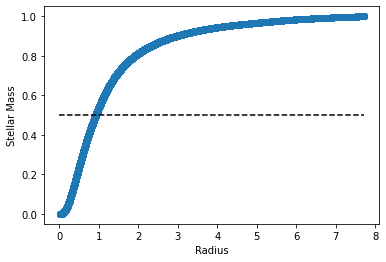

In [5]:
mass_r_g = mass[np.array(np.argsort(r_g))] #gives the star particle of every galaxy in order of increasing r_g
r_h = 0 #half-mass radius
#can do the same with mass but change the outter a_g

#Xax = mass[np.array(np.argsort(r))]
#Do this for other properties so that the indices align with the arrays
#updated_mass[i] = updated_mass[i-1] + mass[i]
#N = len(mass) ----------> already inside the below function

#the commented out block of code lies in a function, where the boolean of 'gt' and 'norm' help determine the formula for Yax
#A is the parameter determine by Xax, so age or radius and so forth

def plot_cumu_mass(mass, r, normed = False):
    """
      mass and r are mass and radius arrays (matched to each other)
      normed gived mass fraction

    """
    masstot = np.sum(mass)
    #should only use the variable mass in this scenario since the variable is already sorted
    masssort = mass[np.argsort(r)]
    N = len(mass)
    massarray = np.zeros(N)
    massarray[0] = mass[0]
    
    for t in range(N-1):
        massarray[t+1] = (massarray[t] + mass[t+1])
        
    massarr = massarray/masstot # Divide out total mass to get mass fraction
    r_g_sort = sorted(r_g) #array r needed to be sorted. but why??? we sorted the mass array with respect to array r.
    
    if normed == True:
        #return massarr
        plt.scatter(r_g_sort, massarr)
    else:
        #return massarray
        plt.scatter(r_g_sort, massarr)
    
    plt.xlabel('Radius')
    plt.ylabel('Stellar Mass')
    
    for i in range(len(massarr)):
        if massarr[i] > 0.5:
            r_h = r_g_sort[i] #half-mass radius
            print('The Half-Mass Radius is at ' + str(r_g_sort[i]) + ' kpc.')
            break
    
    plt.plot([0,np.max(r_g_sort)],[0.5,0.5],'--k')
    
    #Ask, which mass variable should we be using
    #print(mass)
    #print(partq30.mass[np.sqrt(x**2 + y**2 + z**2) < 0.15*dataq30[0].rvir/h])
    #print(masssort)
    
    return r_h
    
r_h = plot_cumu_mass(mass_r_g, r_g, normed = True)
"""
Some comments:
1. cannot use variable 'r' for function plot_cumu_mass because length of array mass and array r are not the same

"""

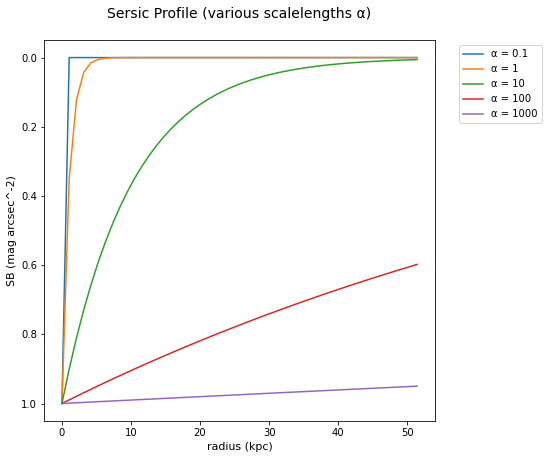

In [6]:
def sersic_profile(dataq):
    rvir = dataq.rvir/h
    rvir_max = rvir[0]

    r_sersic = np.linspace(0,rvir_max)
    I_0 = 1
    alpha = [0.1,1,10,100,1000]
    I_r = np.zeros(len(r_sersic))
    plt.figure(figsize=(7,7))

    #for various scalelengths
    for j in range(len(alpha)):
        for i in range(len(I_r)):
            I_r[i] = I_0 * np.exp(-r_sersic[i]/alpha[j])
        plt.plot(r_sersic,I_r)
        plt.gca().invert_yaxis() #inverts y axis
        plt.title('Sersic Profile (various scalelengths \u03B1)\n',fontsize = 14)
        plt.xlabel('radius (kpc)',fontsize = 11)
        plt.legend(['\u03B1 = 0.1','\u03B1 = 1','\u03B1 = 10','\u03B1 = 100','\u03B1 = 1000'],bbox_to_anchor=[1.05,1.0])
        plt.ylabel('SB (mag arcsec^-2)',fontsize = 11);

    plt.show()
    
sersic_profile(dataq30)

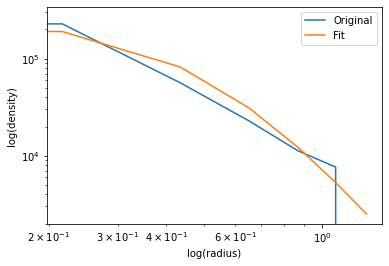

n-star = 0 
star particles = 205165
Plummer Radius = 0.5529829839147615 
Total Mass = 192975.963 
Actual Mass = 5424715.100
Half-Mass Radius = 0.7215134106468478
[5.52982984e-01 1.92975963e+05]
[[4.05295005e-03 3.75889649e+03]
 [3.75889649e+03 3.64166768e+09]]


In [7]:
def plummer_3D_function(r, a, masstot):
    return ( (3*masstot)/(4*np.pi*a**3) )*( 1 + (r/a)**2 )**(-5/2)

#Should look into finding the half-mass radius for indices 0, 1, 2 and 7

def half_mass_3Dradius_function(dataq, index, partq, zoom):
    r_vir = dataq.rvir/h
    r_vir_max = r_vir[index] #why do we need the max virial radius?
    rgal = zoom*dataq.rvir[index]/h
    
    x = partq.x - (dataq[index].xc/h)
    y = partq.y - (dataq[index].yc/h)
    z = partq.z - (dataq[index].zc/h)
    r = np.sqrt(x**2 + y**2 + z**2)
    
    #We will be using the below coordinates/properties variables for our galaxy
    x_g = x[r<rgal]
    y_g = y[r<rgal]
    z_g = z[r<rgal]
    r_g = r[r<rgal] #this is also our 3-D radius
    mass_g = partq.mass[r<rgal]
    
    #Creating arrays
    radius = np.linspace(0, np.max(r_g), int(np.floor(np.max(r_g))))
    density_3D = np.zeros(len(radius))
    plummer_r = np.linspace(0, 1.3, int(np.floor(np.max(r_g))))
    
    #Calculating the plummer density at each index in our radius array
    for i in range(len(radius) - 1):
        density_3D[i] = np.sum(mass_g[(r_g > radius[i]) & (r_g < radius[i + 1])])/( (4/3)*np.pi*(radius[i + 1] - radius[i])**3 )
    
    #Plotting
    params, covs = curve_fit(plummer_3D_function, plummer_r, density_3D)
    a, masstot = params[0], params[1]
    
    #Obtained necessary variables from curve_fit to use for plummer_3D_function fitting
    plummer_fitting = plummer_3D_function(plummer_r, a, masstot)
    
    plt.loglog(plummer_r, density_3D, label = "Original")
    plt.loglog(plummer_r, plummer_fitting, label = "Fit")
    plt.xlabel('log(radius)')
    plt.ylabel('log(density)')
    plt.legend()
    plt.show()
    
    #Calculating Half-Mass Radius
    halfmass_r = a*( ((1/((1/2)**(2/3))) - 1 )**(-1/2) )
    
    print("n-star = %s \nstar particles = %s" %(index, dataq.nstar[index]))
    print("Plummer Radius = %s \nTotal Mass = %0.3f \nActual Mass = %0.3f" %(a, masstot, dataq.mstar[index]/h))
    print("Half-Mass Radius = %s" %halfmass_r)
    print(params)
    print(covs) #For covs, a nested array can be called as covs[0,0] = covs[0,0]
    
half_mass_3Dradius_function(dataq30, 0, partq30, 0.15)

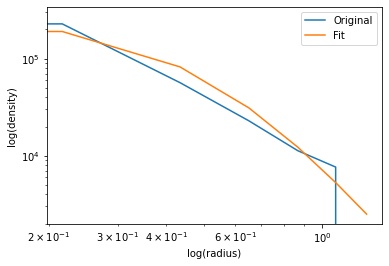

n-star = 0 
star particles = 205165
Plummer Radius = 0.5529775518383301 
Total Mass = 771883.699 
Actual Mass = 5424715.100
Half-Mass Radius = 0.7215063230580667


In [8]:
def plummer_3D_function1(r, a, masstot):
    return ( (3*masstot)/(16*np.pi*a**3) )*( 1 + (r/a)**2 )**(-5/2)

#Should look into finding the half-mass radius for indices 0, 1, 2 and 7

def half_mass_3Dradius_function1(dataq, index, partq, zoom):
    r_vir = dataq.rvir/h
    r_vir_max = r_vir[index] #why do we need the max virial radius?
    rgal = zoom*dataq.rvir[index]/h
    
    x = partq.x - (dataq[index].xc/h)
    y = partq.y - (dataq[index].yc/h)
    z = partq.z - (dataq[index].zc/h)
    r = np.sqrt(x**2 + y**2 + z**2)
    
    #We will be using the below coordinates/properties variables for our galaxy
    x_g = x[r<rgal]
    y_g = y[r<rgal]
    z_g = z[r<rgal]
    r_g = r[r<rgal] #this is also our 3-D radius
    mass_g = partq.mass[r<rgal]
    #Creating arrays
    radius = np.linspace(10**(-10), np.max(r_g), int(np.floor(np.max(r_g))))
    density_3D = np.zeros(len(radius))
    plummer_r = np.linspace(0, 1.3, int(np.floor(np.max(r_g))))
    
    #Calculating the plummer density at each index in our radius array
    for i in range(len(radius) - 1):
        density_3D[i] = np.sum(mass_g[(r_g > radius[i]) & (r_g < radius[i + 1])])/( (4/3)*np.pi*(radius[i + 1] - radius[i])**3 )
        
    #Plotting
    params, covs = curve_fit(plummer_3D_function1, plummer_r, density_3D)
    a, masstot = params[0], params[1]
    
    #Obtained necessary variables from curve_fit to use for plummer_3D_function fitting
    plummer_fitting = plummer_3D_function1(plummer_r, a, masstot)
    
    plt.loglog(plummer_r, density_3D, label = "Original")
    plt.loglog(plummer_r, plummer_fitting, label = "Fit")
    plt.xlabel('log(radius)')
    plt.ylabel('log(density)')
    plt.legend()
    plt.show() 
    
    #Calculating Half-Mass Radius
    halfmass_r = a*( ((1/((1/2)**(2/3))) - 1 )**(-1/2) )
    
    print("n-star = %s \nstar particles = %s" %(index, dataq.nstar[index]))
    print("Plummer Radius = %s \nTotal Mass = %0.3f \nActual Mass = %0.3f" %(a, masstot, dataq.mstar[index]/h))
    print("Half-Mass Radius = %s" %halfmass_r)
    #print(params)
    #print(covs) #For covs, a nested array can be called as covs[0,0] = covs[0,0]
    
half_mass_3Dradius_function1(dataq30, 0, partq30, 0.15)

For the above plummer profiles, we initially attempted the two different plummer models at a zoom of 35 percent. In that attempt, we saw that both profiles gave the same half-mass radius and the fitting profile were similar, if not identical. However, when we look at the two plummer models at a zoom of 15 percent, there is a huge discrepency between them. The fitting profiles are graphically different and the half-mass radius values are as well.

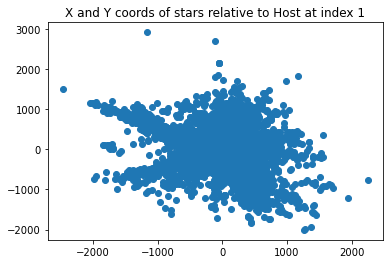

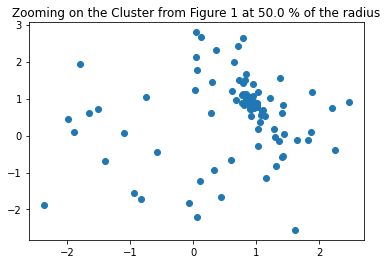

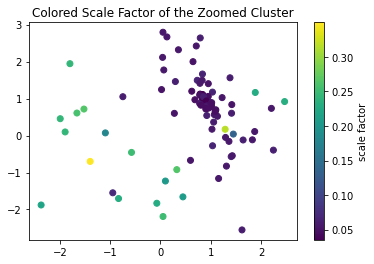

C:\Users\Ryan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Ryan\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


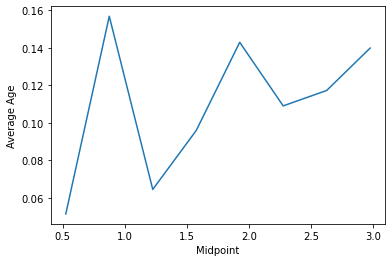

0.657214102930958 0.5714022531859396 -0.09694668215989762
The Half-Mass Radius is at 1.5958498942185386 kpc.


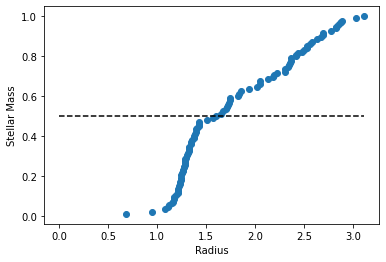

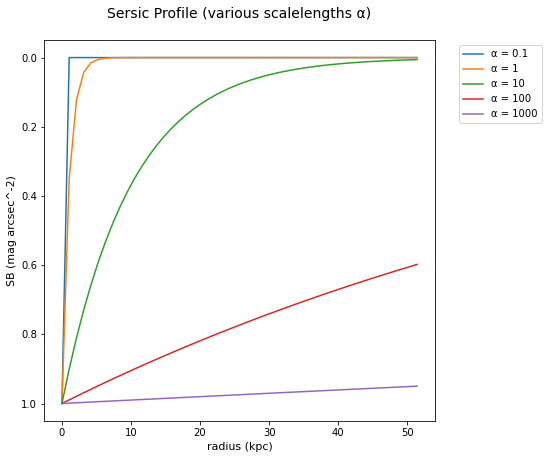

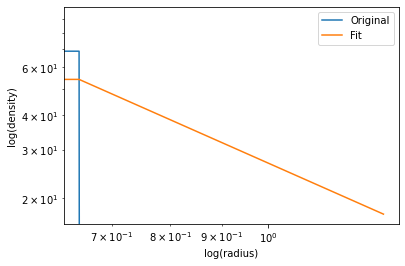

n-star = 1 
star particles = 119
Plummer Radius = 1.3411819373773712 
Total Mass = 926.830 
Actual Mass = 2998.860
Half-Mass Radius = 1.7499286272509524
[  1.34118194 926.82963703]
[[2.88155060e-01 5.37096866e+02]
 [5.37096866e+02 1.04102344e+06]]


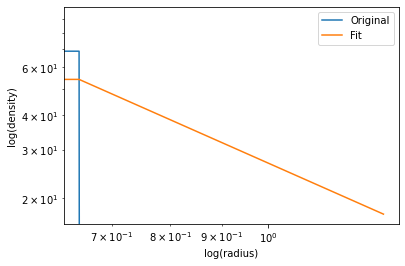

n-star = 1 
star particles = 119
Plummer Radius = 1.341173148829739 
Total Mass = 3707.253 
Actual Mass = 2998.860
Half-Mass Radius = 1.7499171602525796


In [9]:
x, y, z, r, x_g, y_g, z_g, a_g, r_g, mass, rgal, r_vir = initial(1, 0.5, partq30, dataq30, h)
    
#stellarMass_haloMass(dataq.mvir[dataq.mstar>0],dataq.mstar[dataq.mstar>0],h)
#error comes from numbers not being able to be divided by 0

scatter_plot(1)
zoomed_scatter(0.5)
scale_factor_zoom()
avg_age_bin()

print(np.mean(x_g), np.mean(y_g), np.mean(z_g))

mass_r_g = mass[np.array(np.argsort(r_g))] #gives the star particle of every galaxy in order of increasing r

r_h = plot_cumu_mass(mass_r_g, r_g, normed = True)
sersic_profile(dataq30)
half_mass_3Dradius_function(dataq30, 1, partq30, 0.5)
half_mass_3Dradius_function1(dataq30, 1, partq30, 0.5)

In [10]:
headerv30

{'particle.numbers.in.file': array([18524794, 19749366,   599401,        0,     1565,        0]),
 'particle.numbers.total': array([293538508, 293563336,   9654601,         0,     19944,         0],
       dtype=uint32),
 'particle.numbers.total.high.word': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'particle.masses': array([0., 0., 0., 0., 0., 0.]),
 'redshift': 0.0,
 'box.length': 7122.507122507123,
 'file.number.per.snapshot': 16,
 'omega_matter': 0.272,
 'omega_lambda': 0.728,
 'hubble': 0.702,
 'has.star.formation': 1,
 'has.cooling': 1,
 'has.star.age': 1,
 'has.metals': 15,
 'has.feedback': 1,
 'has.double.precision': 0,
 'has.ic.info': 3,
 'cosmological': True,
 'scalefactor': 1.0,
 'box.length/h': 5000.0,
 'baryonic': True,
 'simulation.name': 'm10v r030md',
 'catalog.kind': 'particle'}

In [11]:
headerq

{'particle.numbers.in.file': array([15670448, 15686824,  7279624,        0,    16379,        0]),
 'particle.numbers.total': array([15670448, 15686824,  7279624,        0,    16379,        0],
       dtype=uint32),
 'particle.numbers.total.high.word': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'particle.masses': array([0., 0., 0., 0., 0., 0.]),
 'redshift': 0.0,
 'box.length': 7122.507122507123,
 'file.number.per.snapshot': 1,
 'omega_matter': 0.272,
 'omega_lambda': 0.728,
 'hubble': 0.702,
 'has.star.formation': 1,
 'has.cooling': 1,
 'has.star.age': 1,
 'has.metals': 15,
 'has.feedback': 1,
 'has.double.precision': 0,
 'has.ic.info': 3,
 'compression.level': 0,
 'compression.readme': b'This is a snapshot of FIREbox (PI: Feldmann) -- FIREbox is part of the Feedback in Realistic Environments (FIRE) project -- Use, modification, or distribution only permitted with approval of the PI and the core FIRE team -- No warranty, use at your own risk -- We acknowledge PRACE for awarding us acces

Analysis of M10V R030MD

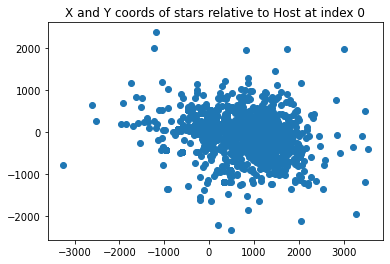

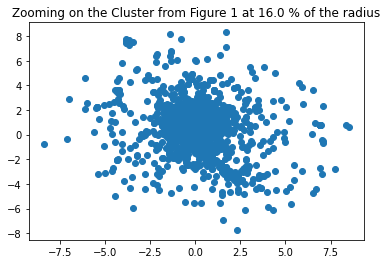

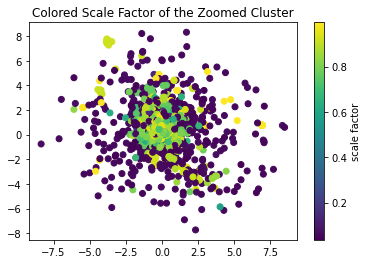

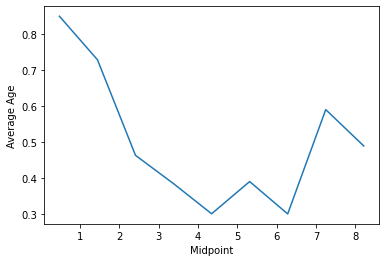

The Half-Mass Radius is at 0.6674038610082751 kpc.


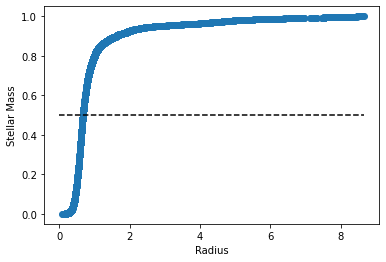

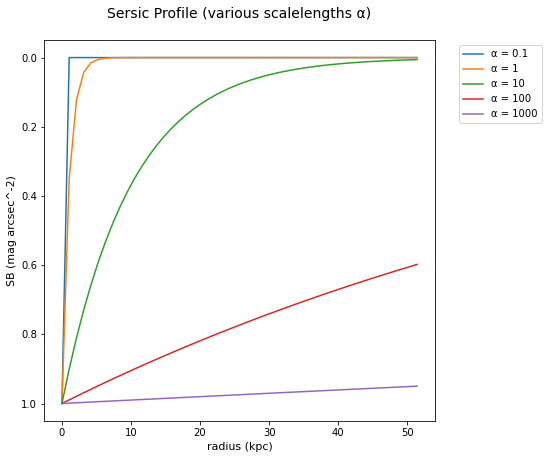

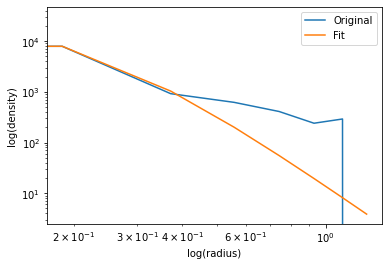

n-star = 0 
star particles = 12480
Plummer Radius = 0.21890203835852598 
Total Mass = 1347.434 
Actual Mass = 353675.214
Half-Mass Radius = 0.2856159427827035
[2.18902038e-01 1.34743448e+03]
[[1.30513025e-05 2.30208536e-01]
 [2.30208536e-01 4.19414849e+03]]


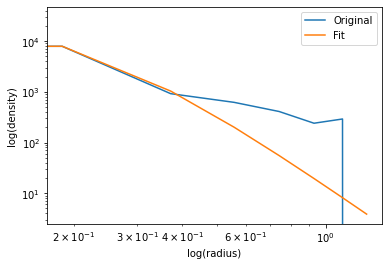

n-star = 0 
star particles = 12480
Plummer Radius = 0.21890203839876282 
Total Mass = 5389.738 
Actual Mass = 353675.214
Half-Mass Radius = 0.2856159428352032


In [16]:
#70 percent seems to have the best centering, but also should check the initial function to see if centering with the mean is necessary
x, y, z, r, x_g, y_g, z_g, a_g, r_g, mass, rgal, r_vir = initial(0, 0.16, partv30, datav30, h)
    
#stellarMass_haloMass(dataq.mvir[dataq.mstar>0],dataq.mstar[dataq.mstar>0],h)
#error comes from numbers not being able to be divided by 0

scatter_plot(0)
zoomed_scatter(0.16)
scale_factor_zoom()
avg_age_bin()

mass_r_g = mass[np.array(np.argsort(r_g))] #gives the star particle of every galaxy in order of increasing r

r_h = plot_cumu_mass(mass_r_g, r_g, normed = True)
sersic_profile(dataq30)
half_mass_3Dradius_function(datav30, 0, partv30, 0.16)
half_mass_3Dradius_function1(datav30, 0, partv30, 0.16)

In [63]:
print(datav30[datav30.nstar>80].nstar) #searches in the file which
m10v_r030_100 = np.where(datav30.nstar>80)

m10v_r030_100[0]

[12480  1723   145   153   161    97    96]


array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [14]:
np.mean(x_g), np.mean(y_g), np.mean(z_g)

(-0.04943089159989901, 0.3840324374884362, -0.3842979903342137)

The Half-Mass Radius is at 0.6674038610082751 kpc.


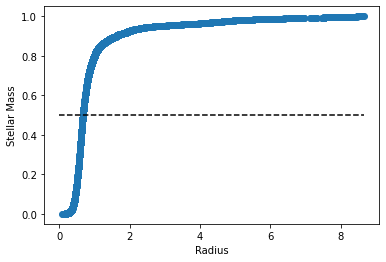

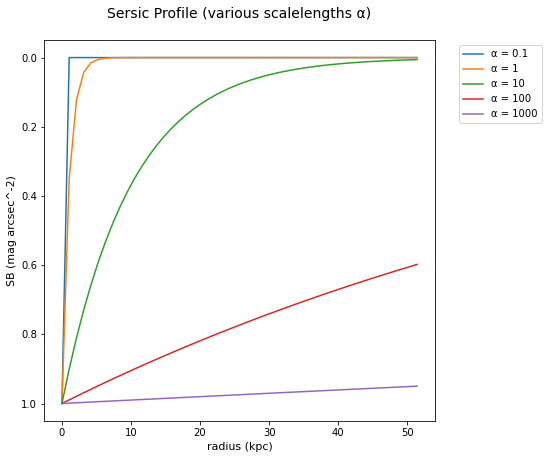

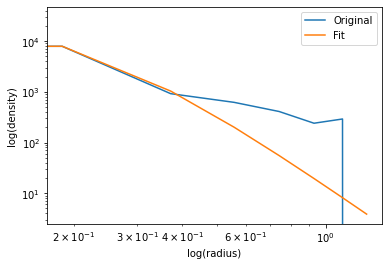

n-star = 0 
star particles = 12480
Plummer Radius = 0.21890203835852598 
Total Mass = 1347.434 
Actual Mass = 353675.214
Half-Mass Radius = 0.2856159427827035
[2.18902038e-01 1.34743448e+03]
[[1.30513025e-05 2.30208536e-01]
 [2.30208536e-01 4.19414849e+03]]


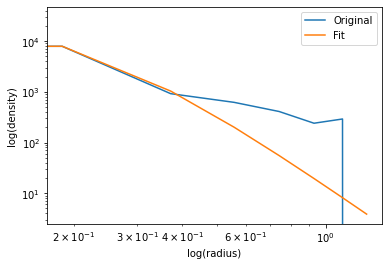

n-star = 0 
star particles = 12480
Plummer Radius = 0.21890203839876282 
Total Mass = 5389.738 
Actual Mass = 353675.214
Half-Mass Radius = 0.2856159428352032
